# Exploring Restaurant Tips Data

## Libraries and Data Loading

In [1]:
# uncomment if you haven't installed these libraries.

# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv('tips.csv')

## Data Overview

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## Descriptive Statistis

_Get a summary of numeric features (mean, standard deviation, etc.)._

In [6]:
# Display basic statistics and information
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


## Data Information

_Check data types and non-null values for each column_

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


## Data Visualization

Distribution of Total Bill : _Explore the distribution of total bill amounts._

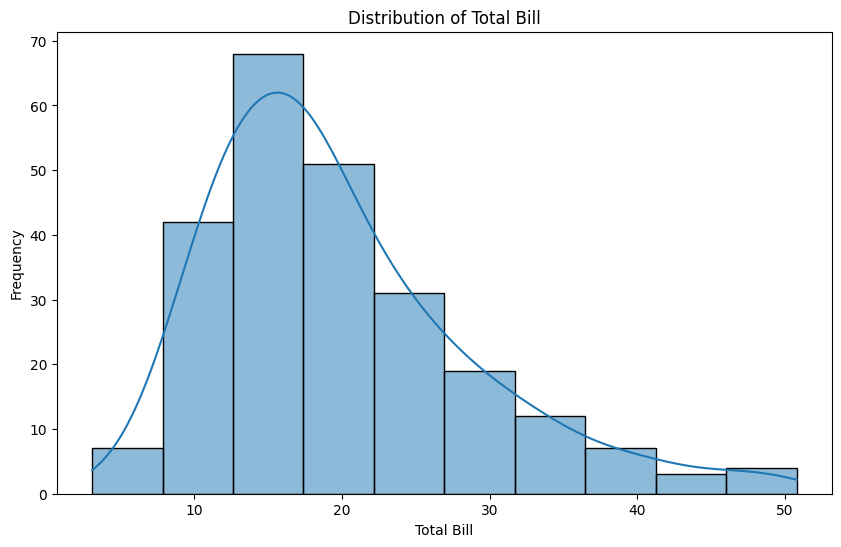

In [8]:
# 1. Distribution of Total Bill
plt.figure(figsize=(10, 6))
sns.histplot(df['total_bill'], kde=True, bins=10)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()


_Distribution of Tip Amounts: Analyze the frequency of different tip amounts._

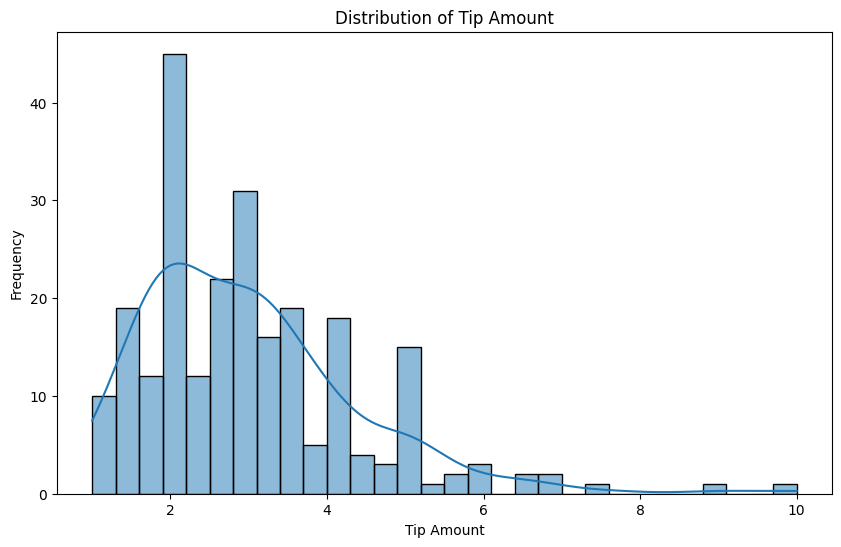

In [9]:
# 2. Distribution of Tip Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], kde=True, bins=30)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

- Total Bill vs. Tip: Visualize the relationship between total bill amount and tip received.

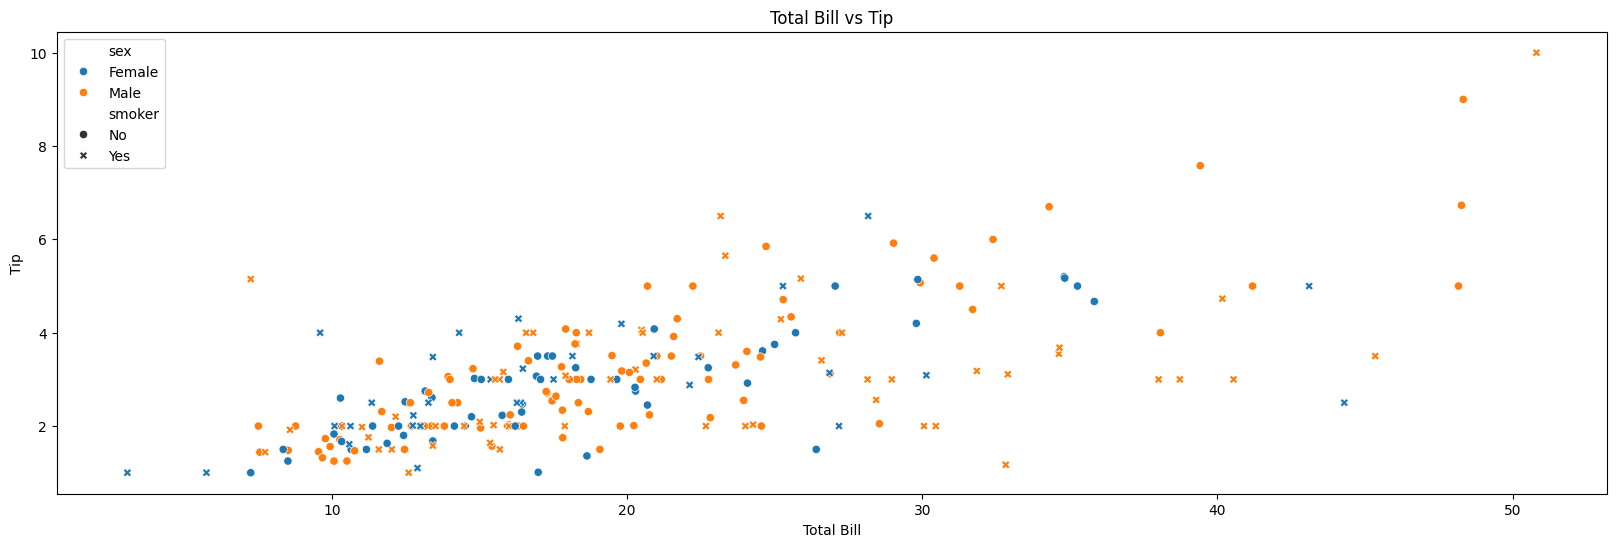

In [10]:
# 3. Relationship between Total Bill and Tip
plt.figure(figsize=(20, 6))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', style='smoker')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

## Tips by Time of Day

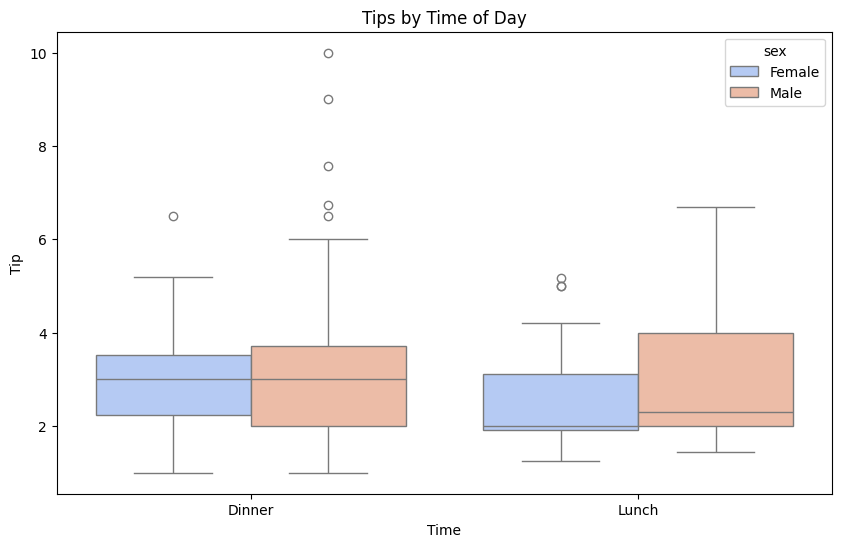

In [11]:
# 5. Tips by Time of Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', y='tip', data=df,hue='sex', palette='coolwarm')
plt.title('Tips by Time of Day')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.show()

## Tip Percentage

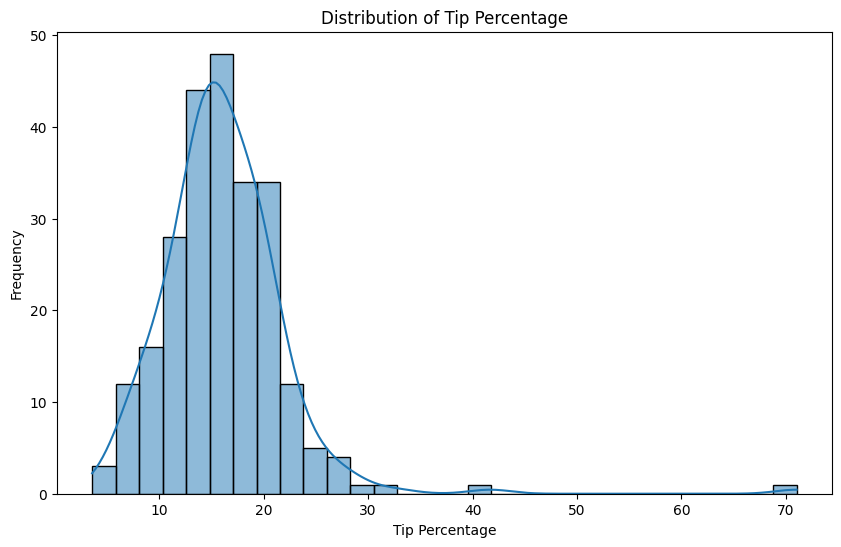

In [12]:
# 6. Tip Percentage (Tip/Total Bill)
df['tip_percentage'] = df['tip'] / df['total_bill'] * 100

plt.figure(figsize=(10, 6))
sns.histplot(df['tip_percentage'], kde=True, bins=30)
plt.title('Distribution of Tip Percentage')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.show()


## Tip Percentage by Smoking Status

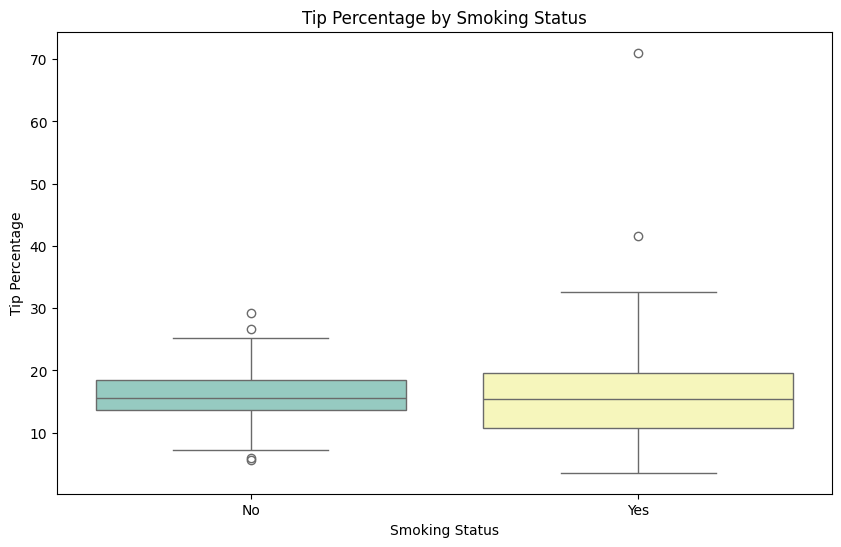

In [13]:

# 7. Tip Percentage by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='tip_percentage', data=df,hue='smoker', palette='Set3')
plt.title('Tip Percentage by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Tip Percentage')
plt.show()

## Correlation Matrix

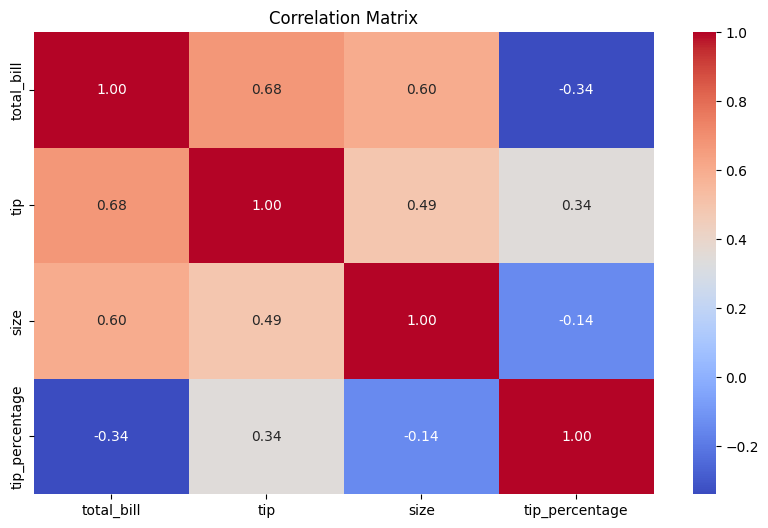

In [14]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 8. Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Preprocessing and Model Building

In [15]:
# Preprocessing: Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define the features (X) and the target (y)
X = df.drop(['tip'], axis=1)
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 0.23
Mean Squared Error: 0.20
R-squared: 0.84
